### Objective: Train a logistic regression model on the California Housing Prices dataset 

In [1]:
# load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
!wget $data

--2022-09-27 17:58:10--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: 'housing.csv.18'

     0K .......... .......... .......... .......... ..........  3% 1023K 1s
    50K .......... .......... .......... .......... ..........  7% 3,26M 1s
   100K .......... .......... .......... .......... .......... 10%  897K 1s
   150K .......... .......... .......... .......... .......... 14% 65,3M 1s
   200K .......... .......... .......... .......... .......... 17% 1,84M 1s
   250K .......... .......... .......... .......... .......... 21% 1,64M 1s
   300K .......... .......... .......... .......... .......... 25%  810K 1s
   350K .....

In [4]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Features

In [5]:
# select desired columns
dcol = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity']

df = df[dcol]

In [6]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Data preparation

*Select only the features from above and fill in the missing values with 0.*

In [8]:
# for this first check for missing values:
df.isnull().sum() # total_bedrooms has many missing values

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
# fill missing values with 0
df.total_bedrooms = df.total_bedrooms.fillna(0)

# check
df.total_bedrooms

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

*Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.*


In [11]:
df['rooms_per_household'] = df.total_rooms/df.households
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853


In [23]:
df['bedrooms_per_room'] = df.total_rooms/df.total_bedrooms
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,6.821705
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,6.418626
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,7.721053
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,5.421277
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,5.810714


In [24]:
df['population_per_household'] = df.population/df.households
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,6.821705,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,6.418626,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,7.721053,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,5.421277,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,5.810714,2.181467


### Question #1
**What is the most frequent observation (mode) for the column ocean_proximity?**

In [25]:
df['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

In [26]:
#checking frequency distribution of categories within the feature
print(df['ocean_proximity'].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


### Answer #1 : The most frequent observation (mode) for the column ocean_proximity is <1H OCEAN

### Question #2

**Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
What are the two features that have the biggest correlation in this dataset?**

In [27]:
# look at the data types first:
df.dtypes

latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [28]:
# get column names
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [29]:
# select all features with numerical and categorical data types seperately:
numerical = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']
categorical = ['ocean_proximity' ]

In [30]:
# correlation matrix for the numerical features of the dataset
pcorr = df[numerical].corr()
pcorr 

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.924664,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,0.084902,0.002366
longitude,-0.924664,1.000000,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,-0.079510,0.002476
housing_median_age,0.011173,-0.108197,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,-0.160853,0.013191
total_rooms,-0.036100,0.044568,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,0.197684,-0.024581
total_bedrooms,-0.065318,0.068082,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,-0.090517,-0.028019
population,-0.108785,0.099773,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,-0.032065,0.069863
households,-0.071035,0.055310,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,-0.067736,-0.027309
median_income,-0.079809,-0.015176,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,0.766578,0.018766
median_house_value,-0.144160,-0.045967,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,0.383920,-0.023737
rooms_per_household,0.106389,-0.027540,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,0.445081,-0.004852


<AxesSubplot:>

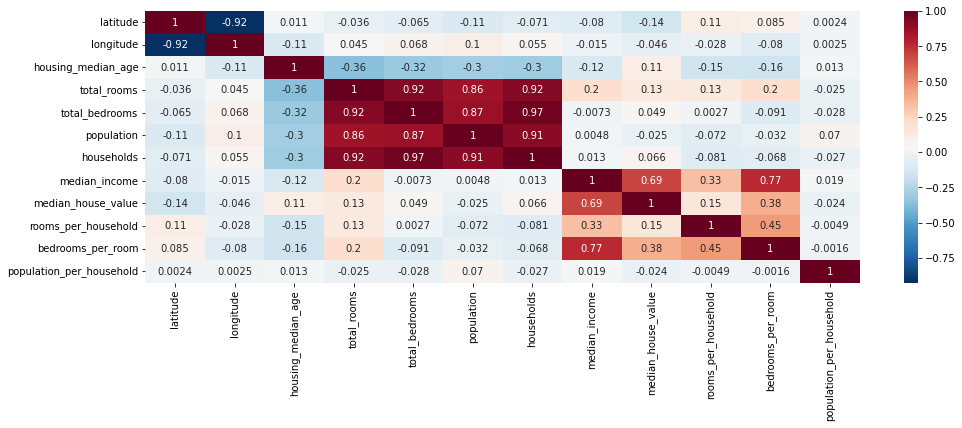

In [31]:
plt.figure(figsize = (16,5))
sns.heatmap(pcorr, 
            xticklabels=pcorr.columns,
            yticklabels=pcorr.columns,
            cmap='RdBu_r',
            annot=True)

correlations between variables:

+ total_bedrooms and households            = 0.98
+ total_bedrooms and total_rooms           = 0.93
+ population and households                = 0.91
+ population_per_household and total_rooms = -0.025

### Answer #2 : The two features with the biggest correlation are total_bedrooms and households with correlation coefficient of 0.98

*Make median_house_value binary
We need to turn the median_house_value variable from numeric into binary.
Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.*

In [32]:
df['above_average'] = (df['median_house_value'] >= df['median_house_value'].mean() ).values.astype(int)

In [33]:
from sklearn.model_selection import train_test_split
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_full_train, df_test = train_test_split(df, test_size=0.20, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

# Reser all Index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

### Question 3
***Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
What is the value of mutual information?
Round it to 2 decimal digits using round(score, 2)***

In [34]:
#Mutual information
from sklearn.metrics import mutual_info_score

In [35]:
categorcal_col = list(df_train.select_dtypes(object))
categorcal_col

['ocean_proximity']

In [36]:
mutual_info = mutual_info_score(df_train.above_average, df_train.ocean_proximity).round(2)
mutual_info

0.1

### Answer #3 : The mutual info score for ocean proximity is 0.1

### Question 4
***Now let's train a logistic regression
Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.***

In [38]:
from sklearn.feature_extraction import DictVectorizer
# Select target value (median_house_value)
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values


df_train = df_train.drop(['median_house_value', 'above_average'], axis=1)
df_val= df_val.drop(['median_house_value', 'above_average'], axis=1)
df_test = df_test.drop(['median_house_value', 'above_average'], axis=1)

In [39]:
# One-hot encoding
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [42]:
accuracy = model.score(X_val, y_val)

In [43]:
accuracy

0.8393895348837209

### Answer #4 : The accuracy is 0.84

### Question 5
+ Let's find the least useful feature using the feature elimination technique.
+ Train a model with all these features (using the same parameters as in Q4).
+ Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
+ For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

In [45]:
features = ['total_rooms', 'total_bedrooms', 'population', 'households']

In [46]:
# make a function for all features and keep eliminating each feature when trainig models
def calculate_accuracy(features):
    
    # one-hot encoding datasets
    dv = DictVectorizer(sparse=False)

    train_dict = df_train[features].to_dict(orient='records')
    val_dict = df_val[features].to_dict(orient='records')

    X_train = dv.fit_transform(train_dict)
    X_val = dv.transform(val_dict)

    # trainign models
    model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    # apply models on vaöidation datasets
    y_pred_new = model.predict_proba(X_val)[:,1]

    #add a threshold
    decision = (y_pred_new >= 0.5)

    # accuracy
    accuracy = (y_val == decision).mean()
    

    df_pred = pd.DataFrame()
    df_pred['probability'] = y_pred_new
    df_pred['prediction'] = decision
    df_pred['actual'] = y_val
    df_pred['correct'] = df_pred.prediction == df_pred.actual
    return accuracy, df_pred

acc, df_pred = calculate_accuracy(features)    

print(acc)
df_pred.head()

0.7095445736434108


,probability,prediction,actual,correct
0,0.446557,False,0,True
1,0.382765,False,0,True
2,0.625729,True,1,True
3,0.489605,False,1,False
4,0.644218,True,1,True


In [47]:
orig_score = accuracy

In [48]:
for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

total_rooms 0.21148255813953487 0.627906976744186
total_bedrooms 0.1785368217054264 0.6608527131782945
population 0.18338178294573637 0.6560077519379846
households 0.1678779069767442 0.6715116279069767


### Answer #5 : Total bedrooms

### Question 6
+ For this question, we'll see how to use a linear regression model from Scikit-Learn
+ We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
+ Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
+ This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
+ Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
+ If there are multiple options, select the smallest alpha.

In [49]:
y_train_lin = np.log1p(y_train)
y_val_lin = np.log1p(y_val)
y_pred_lin = np.log1p(y_pred)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
scores = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
    model =  Ridge(alpha=alpha, solver="sag", random_state=42)
    model.fit(X_train, y_train_lin)
    y_pred = model.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val_lin, y_pred_lin))
    scores[alpha] = score.round(3)
    print(alpha, score)

0 0.397269717458022
0.01 0.397269717458022
0.1 0.397269717458022
1 0.397269717458022
10 0.397269717458022


### Answer #6 : The smallest alpha is 0